# Balloon HDF5 Header Reader

This simple notebook shows how we can read radio neutrino event header data from the HDF5 and make some plots


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import h5py
import scipy.constants


In [2]:
run=134
f = h5py.File('flight2016/hdf5/run'+str(run)+'/header'+str(run)+'.hdf5')
rungr=f['run'+str(run)]


In [3]:
print(rungr.keys())

<KeysViewHDF5 ['altitude', 'attFlag', 'brms', 'distToWais', 'eventNumber', 'goodTimeFlag', 'heading', 'isWAIS', 'isWAISH', 'l3TrigPattern', 'l3TrigPatternH', 'latitude', 'longitude', 'mrms', 'phiTrigMask', 'phiTrigMaskH', 'pitch', 'priority', 'roll', 'triggerTime', 'triggerTimeNs']>


Text(0, 0.5, 'Altitude (m)')

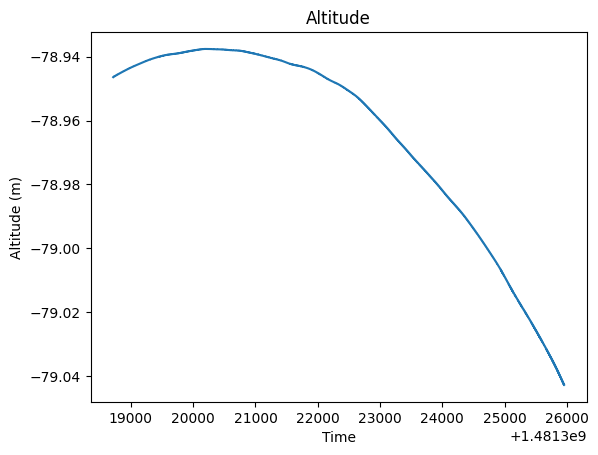

In [4]:
fig,ax = plt.subplots()
ax.set_title("Altitude")
#print(rungr['triggerTime'][:])
ax.plot(rungr['triggerTime'][:],rungr['latitude'][:])
ax.set_xlabel("Time")
ax.set_ylabel("Altitude (m)")

distToWais [ 69191.38825927  69192.1622736   69193.11499378 ... 116777.89788847
 116777.89788847 116777.89788847]


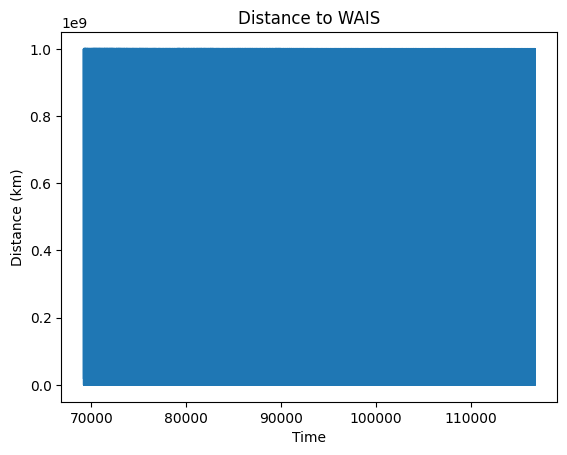

In [5]:
fig,ax = plt.subplots()
ax.set_title("Distance to WAIS")
ax.plot(rungr['distToWais'][:],rungr['triggerTimeNs'][:]-1e9*rungr['distToWais'][:]/scipy.constants.c)
ax.set_xlabel("Time")
ax.set_ylabel("Distance (km)")

print('distToWais',rungr['distToWais'][:])


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([-20000.        , -19979.989995  , -19959.97998999, ...,
         19959.97999   ,  19979.989995  ,  20000.        ]),
 <BarContainer object of 1999 artists>)

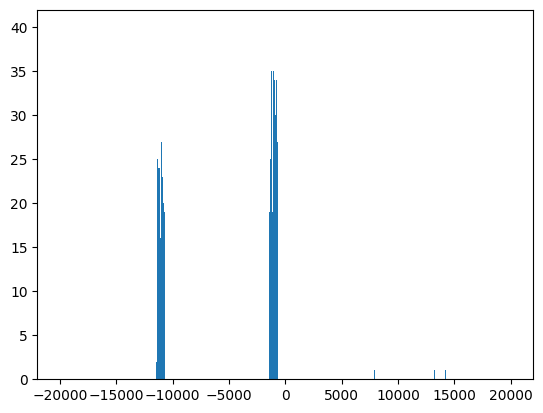

In [6]:
fig,ax = plt.subplots()
bins=np.linspace(-20e3,20e3,2000)
ax.hist(rungr['triggerTimeNs'][:]-1e9*rungr['distToWais'][:]/scipy.constants.c,bins=bins)

In [7]:
import numpy as np
import os.path
totH=0
totV=0
totHE=0
totVE=0
for run in range(39,369):
    eventFile='flight2016/hdf5/run'+str(run)+'/event'+str(run)+'.hdf5'
    f = h5py.File('flight2016/hdf5/run'+str(run)+'/header'+str(run)+'.hdf5')
    rungr=f['run'+str(run)]
    if 'isWAISH' in rungr.keys():
        nH=np.sum(rungr['isWAISH'][:])
        nV=np.sum(rungr['isWAIS'][:])
        print(run,nV,nH,os.path.isfile(eventFile))
        totH+=nH
        totV+=nV
        if os.path.isfile(eventFile):
            totHE+=nH
            totVE+=nV
print("Total V",totV)
print("Total H",totH)
print("Total With File V",totVE)
print("Total With File H",totHE)

42 2 1 False
43 8 4 False
44 14 5 False
45 3 4 False
46 3 2 False
47 1 1 False
48 1 0 False
49 0 0 False
50 2 2 False
51 4 1 False
52 1 1 False
53 0 0 False
54 0 0 False
55 2 2 False
56 0 0 False
57 1 0 False
58 0 0 False
59 1 0 False
62 0 0 False
63 0 1 False
64 3 1 False
65 0 1 False
66 2 0 False
67 1 3 False
68 3 2 False
69 0 1 False
70 0 3 False
71 5 0 False
72 2 3 False
73 4 1 False
74 1 2 False
75 0 1 False
76 1 1 False
77 5 1 False
78 2 2 False
79 2 3 False
80 5 2 False
81 1 0 False
82 0 2 False
83 2 1 False
84 2 1 False
85 4 2 False
86 1 2 False
87 3 0 False
88 3 3 False
89 3 2 False
90 4 1 False
91 2 3 False
92 2 2 False
93 1 1 False
94 0 2 False
95 0 2 False
96 2 0 False
97 2 1 False
98 2 1 False
99 2 1 False
100 0 2 True
101 2 3 True
102 2 0 True
103 1 2 True
104 3 2 True
105 2 1 True
106 5 4 True
107 3 1 True
108 1 2 True
109 1 1 True
110 6 3 False
111 4 2 False
112 3 4 False
113 1 2 False
114 0 1 False
115 2 1 False
116 1 4 False
117 0 1 False
118 2 3 False
119 3 6 False
1